In [74]:
#In this whole exercise we have taken daily weather data of one location from 2010 to 2019 and we have consider below parameters to
#analyse and create different trends.

#1.Daily Rainfall Total (mm),2.Mean Temperature (°C),3.Maximum Temperature (°C),4.Minimum Temperature (°C),5.Mean Wind Speed (km/h) and 6.Max Wind Speed (km/h)

#importing all required libraries
from pyspark.sql.functions import sum,avg,max,min,mean,count
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import joypy
from matplotlib import cm

spark = SparkSession.builder.appName("Weather Analysis").getOrCreate()

In [2]:
#creating Spark table
#Parameters we consider here are : Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C)
#Mean Wind Speed (km/h) and Max Wind Speed (km/h)
#data we consder for analysis is from 2010 to 2019

from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
weather_2010_to_2019_schema = StructType([StructField("Date", StringType(), True),
                            StructField("Year", IntegerType(), True ),
                            StructField("Month", IntegerType(), True),
                            StructField("Month_Name", StringType(), True),
                            StructField("Quarter", IntegerType(), True  ),
                            StructField("Day", IntegerType(), True ),
                            StructField("Daily Rainfall Total (mm)", DoubleType(), True ),
                            StructField("Mean Temperature (°C)", DoubleType(), True),
                            StructField("Maximum Temperature (°C)", DoubleType(), True),
                            StructField("Minimum Temperature (°C)", DoubleType(), True),
                            StructField("Mean Wind Speed (km/h)", DoubleType(), True),
                            StructField("Max Wind Speed (km/h)", DoubleType(), True),
                          
                            ])

In [3]:
#loading data from csv file to the spark table
weather_2010_to_2019 = spark.read.csv('./datasets/weather_2010_2019_full.csv',header = True, schema = weather_2010_to_2019_schema)

In [4]:
#printing total records
print(" The weather_2010_to_2019 dataframe has {} records".format(weather_2010_to_2019.count()))

 The weather_2010_to_2019 dataframe has 3652 records


In [5]:
#printing columns
weather_2010_to_2019.columns

['Date',
 'Year',
 'Month',
 'Month_Name',
 'Quarter',
 'Day',
 'Daily Rainfall Total (mm)',
 'Mean Temperature (°C)',
 'Maximum Temperature (°C)',
 'Minimum Temperature (°C)',
 'Mean Wind Speed (km/h)',
 'Max Wind Speed (km/h)']

In [6]:
#printing columns with their data types
weather_2010_to_2019.dtypes

[('Date', 'string'),
 ('Year', 'int'),
 ('Month', 'int'),
 ('Month_Name', 'string'),
 ('Quarter', 'int'),
 ('Day', 'int'),
 ('Daily Rainfall Total (mm)', 'double'),
 ('Mean Temperature (°C)', 'double'),
 ('Maximum Temperature (°C)', 'double'),
 ('Minimum Temperature (°C)', 'double'),
 ('Mean Wind Speed (km/h)', 'double'),
 ('Max Wind Speed (km/h)', 'double')]

In [7]:
#printing Schema
weather_2010_to_2019.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Month_Name: string (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Daily Rainfall Total (mm): double (nullable = true)
 |-- Mean Temperature (°C): double (nullable = true)
 |-- Maximum Temperature (°C): double (nullable = true)
 |-- Minimum Temperature (°C): double (nullable = true)
 |-- Mean Wind Speed (km/h): double (nullable = true)
 |-- Max Wind Speed (km/h): double (nullable = true)



In [8]:
#loading data from Spark datafrmae to the Pandas
pandas_weather_2010_to_2019 = weather_2010_to_2019.select("*").toPandas()

In [9]:
#from datetime import datetime
#from pyspark.sql.functions import col,udf
#myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
#df = weather_2010_to_2019.withColumn('Date_time', myfunc(col('Date'))).drop("Date")
#df.select(df["Date_time"]).show(5)

In [10]:
weather_2010_to_2019.select(["Year","Daily Rainfall Total (mm)","Mean Temperature (°C)","Maximum Temperature (°C)","Minimum Temperature (°C)","Mean Wind Speed (km/h)","Max Wind Speed (km/h)"]).describe().show()

+-------+-----------------+-------------------------+---------------------+------------------------+------------------------+----------------------+---------------------+
|summary|             Year|Daily Rainfall Total (mm)|Mean Temperature (°C)|Maximum Temperature (°C)|Minimum Temperature (°C)|Mean Wind Speed (km/h)|Max Wind Speed (km/h)|
+-------+-----------------+-------------------------+---------------------+------------------------+------------------------+----------------------+---------------------+
|  count|             3652|                     3652|                 3652|                    3652|                    3652|                  3652|                 3652|
|   mean|2014.499726177437|         5.31204819277109|    27.94646768893753|       31.60621577217962|      25.291757940854318|     8.724618899175788|    32.81174155124857|
| stddev|2.872293230049476|       12.585972656823202|    1.124255672473006|      1.5103032341913498|      1.3372793478690732|    2.93859512024250

In [11]:

#formatting the columns

from pyspark.sql.functions import format_number
result = weather_2010_to_2019.select(["Year","Daily Rainfall Total (mm)","Mean Temperature (°C)","Maximum Temperature (°C)","Minimum Temperature (°C)","Mean Wind Speed (km/h)","Max Wind Speed (km/h)"]).describe()
result.select(result['summary'],
              format_number(result['Daily Rainfall Total (mm)'].cast('float'),2).alias('Daily Rainfall Total (mm)'),
              format_number(result['Mean Temperature (°C)'].cast('float'),2).alias('Mean Temperature (°C)'),
              result['Year'].cast('int').alias('Year'),
              format_number(result['Maximum Temperature (°C)'].cast('float'),2).alias('Maximum Temperature (°C)'),
              format_number(result['Minimum Temperature (°C)'].cast('float'),2).alias('Maximum Temperature (°C)'),
              format_number(result['Mean Wind Speed (km/h)'].cast('float'),2).alias('Mean Wind Speed (km/h)'),
              format_number(result['Max Wind Speed (km/h)'].cast('float'),2).alias('Max Wind Speed (km/h)')
             ).show()

+-------+-------------------------+---------------------+----+------------------------+------------------------+----------------------+---------------------+
|summary|Daily Rainfall Total (mm)|Mean Temperature (°C)|Year|Maximum Temperature (°C)|Maximum Temperature (°C)|Mean Wind Speed (km/h)|Max Wind Speed (km/h)|
+-------+-------------------------+---------------------+----+------------------------+------------------------+----------------------+---------------------+
|  count|                 3,652.00|             3,652.00|3652|                3,652.00|                3,652.00|              3,652.00|             3,652.00|
|   mean|                     5.31|                27.95|2014|                   31.61|                   25.29|                  8.72|                32.81|
| stddev|                    12.59|                 1.12|   2|                    1.51|                    1.34|                  2.94|                 6.80|
|    min|                     0.00|                2

In [12]:
#printing Maximum and Minimum temperatures

temp_max = weather_2010_to_2019.agg({"Maximum Temperature (°C)" : "max"}).collect()[0][0]
print("The maximum Temperature (°C) values is {}".format(temp_max))

temp_min = weather_2010_to_2019.agg({"Minimum Temperature (°C)" : "min"}).collect()[0][0]
print("The minimum Temperature (°C) values is {}".format(temp_min))


The maximum Temperature (°C) values is 35.5
The minimum Temperature (°C) values is 20.9


In [13]:
from pyspark.sql.functions import max,min
weather_2010_to_2019.select(max("Maximum Temperature (°C)"),min("Minimum Temperature (°C)")).show()

+-----------------------------+-----------------------------+
|max(Maximum Temperature (°C))|min(Minimum Temperature (°C))|
+-----------------------------+-----------------------------+
|                         35.5|                         20.9|
+-----------------------------+-----------------------------+



In [14]:
df_Year_Wise_Temp=weather_2010_to_2019.groupBy("Year").agg(avg("Maximum Temperature (°C)").alias("Maximum Temperature (°C)"),avg("Minimum Temperature (°C)").alias("Minimum Temperature (°C)"),avg("Mean Temperature (°C)").alias("Mean Temperature (°C)"),sum("Daily Rainfall Total (mm)").alias("Daily Rainfall Total (mm)"))

In [15]:
df_Year_Wise_Temp_Quarter=weather_2010_to_2019.groupBy("Year","Quarter").agg(avg("Maximum Temperature (°C)").alias("Maximum Temperature (°C)"),avg("Minimum Temperature (°C)").alias("Minimum Temperature (°C)"),avg("Mean Temperature (°C)").alias("Mean Temperature (°C)"),sum("Daily Rainfall Total (mm)").alias("Daily Rainfall Total (mm)"))

In [16]:
#printing Quarterwise parameters values

df_Year_Wise_Temp_Quarter.select(df_Year_Wise_Temp_Quarter["Year"],df_Year_Wise_Temp_Quarter["Quarter"],
              format_number(df_Year_Wise_Temp_Quarter['Maximum Temperature (°C)'].cast('float'),2).alias('Maximum Temperature (°C)'),
              format_number(df_Year_Wise_Temp_Quarter['Minimum Temperature (°C)'].cast('float'),2).alias('Minimum Temperature (°C)'),
              format_number(df_Year_Wise_Temp_Quarter['Mean Temperature (°C)'].cast('float'),2).alias('Mean Temperature (°C)'),
              format_number(df_Year_Wise_Temp_Quarter['Daily Rainfall Total (mm)'].cast('float'),2).alias('Daily Rainfall Total (mm)')).sort("Year","Quarter").show()

+----+-------+------------------------+------------------------+---------------------+-------------------------+
|Year|Quarter|Maximum Temperature (°C)|Minimum Temperature (°C)|Mean Temperature (°C)|Daily Rainfall Total (mm)|
+----+-------+------------------------+------------------------+---------------------+-------------------------+
|2010|      1|                   32.55|                   25.02|                28.29|                   313.80|
|2010|      2|                   32.46|                   25.41|                28.71|                   556.50|
|2010|      3|                   31.30|                   24.71|                27.88|                   578.40|
|2010|      4|                   31.36|                   24.36|                27.48|                   626.40|
|2011|      1|                   30.88|                   23.85|                26.86|                   792.80|
|2011|      2|                   31.88|                   25.01|                28.26|          

In [17]:

df_Year_Wise_Temp.select(df_Year_Wise_Temp["Year"],
              format_number(df_Year_Wise_Temp['Maximum Temperature (°C)'].cast('float'),2).alias('Maximum Temperature (°C)'),
              format_number(df_Year_Wise_Temp['Minimum Temperature (°C)'].cast('float'),2).alias('Minimum Temperature (°C)'),
              format_number(df_Year_Wise_Temp['Mean Temperature (°C)'].cast('float'),2).alias('Mean Temperature (°C)'),
              format_number(df_Year_Wise_Temp['Daily Rainfall Total (mm)'].cast('float'),2).alias('Daily Rainfall Total (mm)')).sort("Year")
df_Year_Wise_Temp.show()

+----+------------------------+------------------------+---------------------+-------------------------+
|Year|Maximum Temperature (°C)|Minimum Temperature (°C)|Mean Temperature (°C)|Daily Rainfall Total (mm)|
+----+------------------------+------------------------+---------------------+-------------------------+
|2018|       31.59945205479452|       25.35561643835616|   27.885205479452054|       1708.1999999999998|
|2015|      31.867123287671234|       25.77972602739726|   28.241369863013656|       1266.8000000000004|
|2013|      31.301369863013694|       24.97561643835617|    27.65479452054794|        2748.399999999999|
|2014|      31.587945205479464|      25.267123287671215|   27.918356164383564|       1538.4000000000008|
|2019|       32.29808219178082|       25.91835616438356|   28.443013698630143|       1367.5000000000007|
|2012|       31.19043715846996|       24.97759562841531|    27.54262295081966|        2159.900000000001|
|2016|       31.98251366120219|       25.79453551912569

In [18]:
#printing yearwise values
df_Year_Wise_Temp1=df_Year_Wise_Temp.select(df_Year_Wise_Temp["Year"],
              format_number(df_Year_Wise_Temp['Maximum Temperature (°C)'].cast('float'),2).alias('Maximum Temperature (°C)'),
              format_number(df_Year_Wise_Temp['Minimum Temperature (°C)'].cast('float'),2).alias('Minimum Temperature (°C)'),
              format_number(df_Year_Wise_Temp['Mean Temperature (°C)'].cast('float'),2).alias('Mean Temperature (°C)'),
              format_number(df_Year_Wise_Temp['Daily Rainfall Total (mm)'].cast('float'),2).alias('Daily Rainfall Total (mm)')
                             ).sort("Year")

In [19]:
df_Year_Wise_Temp1.show()


+----+------------------------+------------------------+---------------------+-------------------------+
|Year|Maximum Temperature (°C)|Minimum Temperature (°C)|Mean Temperature (°C)|Daily Rainfall Total (mm)|
+----+------------------------+------------------------+---------------------+-------------------------+
|2010|                   31.91|                   24.87|                28.09|                 2,075.10|
|2011|                   31.18|                   24.73|                27.57|                 2,524.20|
|2012|                   31.19|                   24.98|                27.54|                 2,159.90|
|2013|                   31.30|                   24.98|                27.65|                 2,748.40|
|2014|                   31.59|                   25.27|                27.92|                 1,538.40|
|2015|                   31.87|                   25.78|                28.24|                 1,266.80|
|2016|                   31.98|                   25.79

In [20]:
df_Year_Wise_Temp1 = df_Year_Wise_Temp1.withColumn("Year", df_Year_Wise_Temp1["Year"].cast(IntegerType()))
df_Year_Wise_Temp1 = df_Year_Wise_Temp1.withColumn("Maximum Temperature (°C)", df_Year_Wise_Temp1["Maximum Temperature (°C)"].cast(DoubleType()))
df_Year_Wise_Temp1 = df_Year_Wise_Temp1.withColumn("Minimum Temperature (°C)", df_Year_Wise_Temp1["Minimum Temperature (°C)"].cast(DoubleType()))
df_Year_Wise_Temp1 = df_Year_Wise_Temp1.withColumn("Mean Temperature (°C)", df_Year_Wise_Temp1["Mean Temperature (°C)"].cast(DoubleType()))
df_Year_Wise_Temp1 = df_Year_Wise_Temp1.withColumn("Daily Rainfall Total (mm)", df_Year_Wise_Temp1["Daily Rainfall Total (mm)"].cast(DoubleType()))

In [21]:
df_Year_Wise_Temp1.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Maximum Temperature (°C): double (nullable = true)
 |-- Minimum Temperature (°C): double (nullable = true)
 |-- Mean Temperature (°C): double (nullable = true)
 |-- Daily Rainfall Total (mm): double (nullable = true)



In [22]:

pandas_df = df_Year_Wise_Temp1.select("*").toPandas()


In [23]:
pandas_df

,Year,Maximum Temperature (°C),Minimum Temperature (°C),Mean Temperature (°C),Daily Rainfall Total (mm)
0,2010,31.91,24.87,28.09,NaN
1,2011,31.18,24.73,27.57,NaN
2,2012,31.19,24.98,27.54,NaN
3,2013,31.30,24.98,27.65,NaN
4,2014,31.59,25.27,27.92,NaN
5,2015,31.87,25.78,28.24,NaN
6,2016,31.98,25.79,28.43,NaN
7,2017,31.15,25.25,27.70,NaN
8,2018,31.60,25.36,27.89,NaN
9,2019,32.30,25.92,28.44,NaN


In [24]:
pandas_df.dtypes

Year                           int32
Maximum Temperature (°C)     float64
Minimum Temperature (°C)     float64
Mean Temperature (°C)        float64
Daily Rainfall Total (mm)    float64
dtype: object

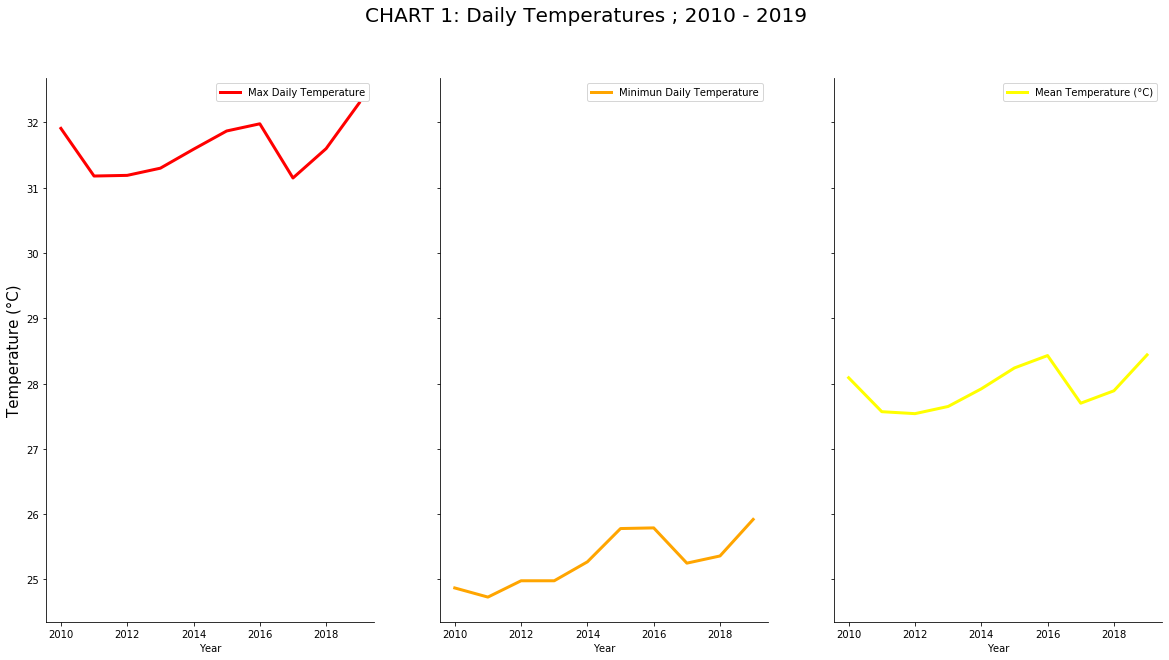

In [25]:
#displaying line chart to show variation of Maximum,Minimum and Mean Temperature values from 2010 to 2019

fig, axs = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
sns.lineplot(
    x="Year",
    y="Maximum Temperature (°C)",
    linewidth=3,
    data=pandas_df,
    label="Max Daily Temperature",
    color="red",
    ax=axs[0],
)
sns.lineplot(
    x="Year",
    y="Minimum Temperature (°C)",
    linewidth=3,
    data=pandas_df,
    label="Minimun Daily Temperature",
    color="orange",
    ax=axs[1],
)
sns.lineplot(
    x="Year",
    y="Mean Temperature (°C)",
    linewidth=3,
    data=pandas_df,
    label="Mean Temperature (°C)",
    color="yellow",
    ax=axs[2],
)
fig.suptitle("CHART 1: Daily Temperatures ; 2010 - 2019", fontsize=20)
axs[0].set_ylabel("Temperature (°C)", fontsize=15)
sns.despine()
plt.show()

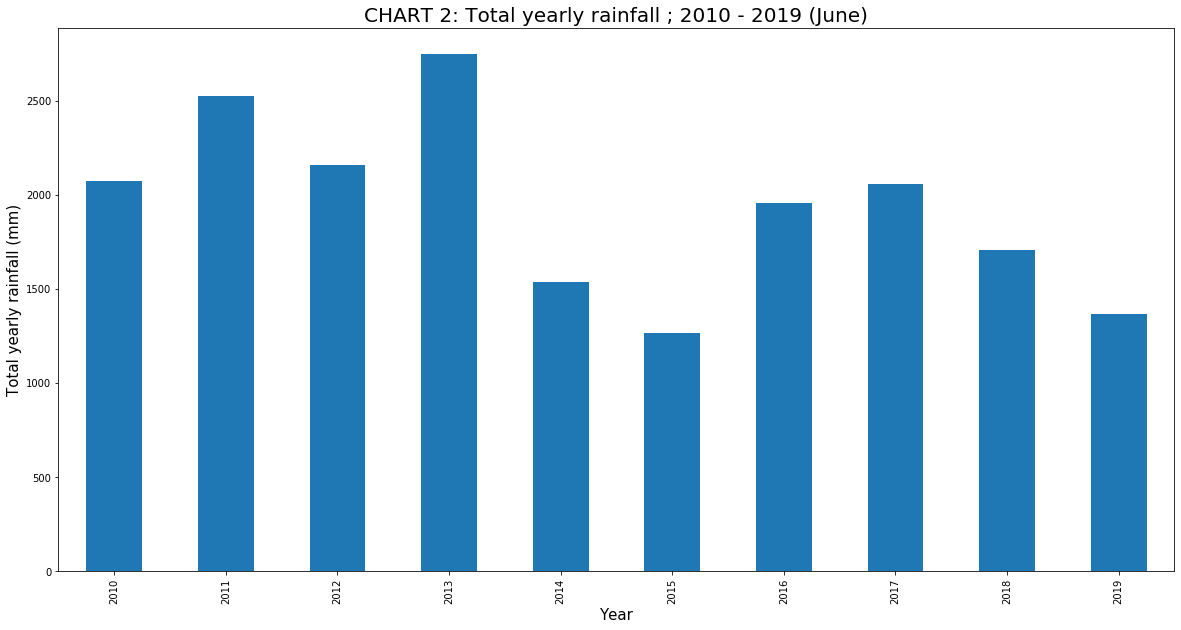

In [26]:
#Displaying bar chart to show  yearwise rainfall variation 

pandas_weather_2010_to_2019.groupby(
    ["Year"]
)['Daily Rainfall Total (mm)'].sum().plot(kind="bar", figsize=(20, 10))
plt.title('CHART 2: Total yearly rainfall ; 2010 - 2019 (June)', fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total yearly rainfall (mm)", fontsize=15)
plt.show()

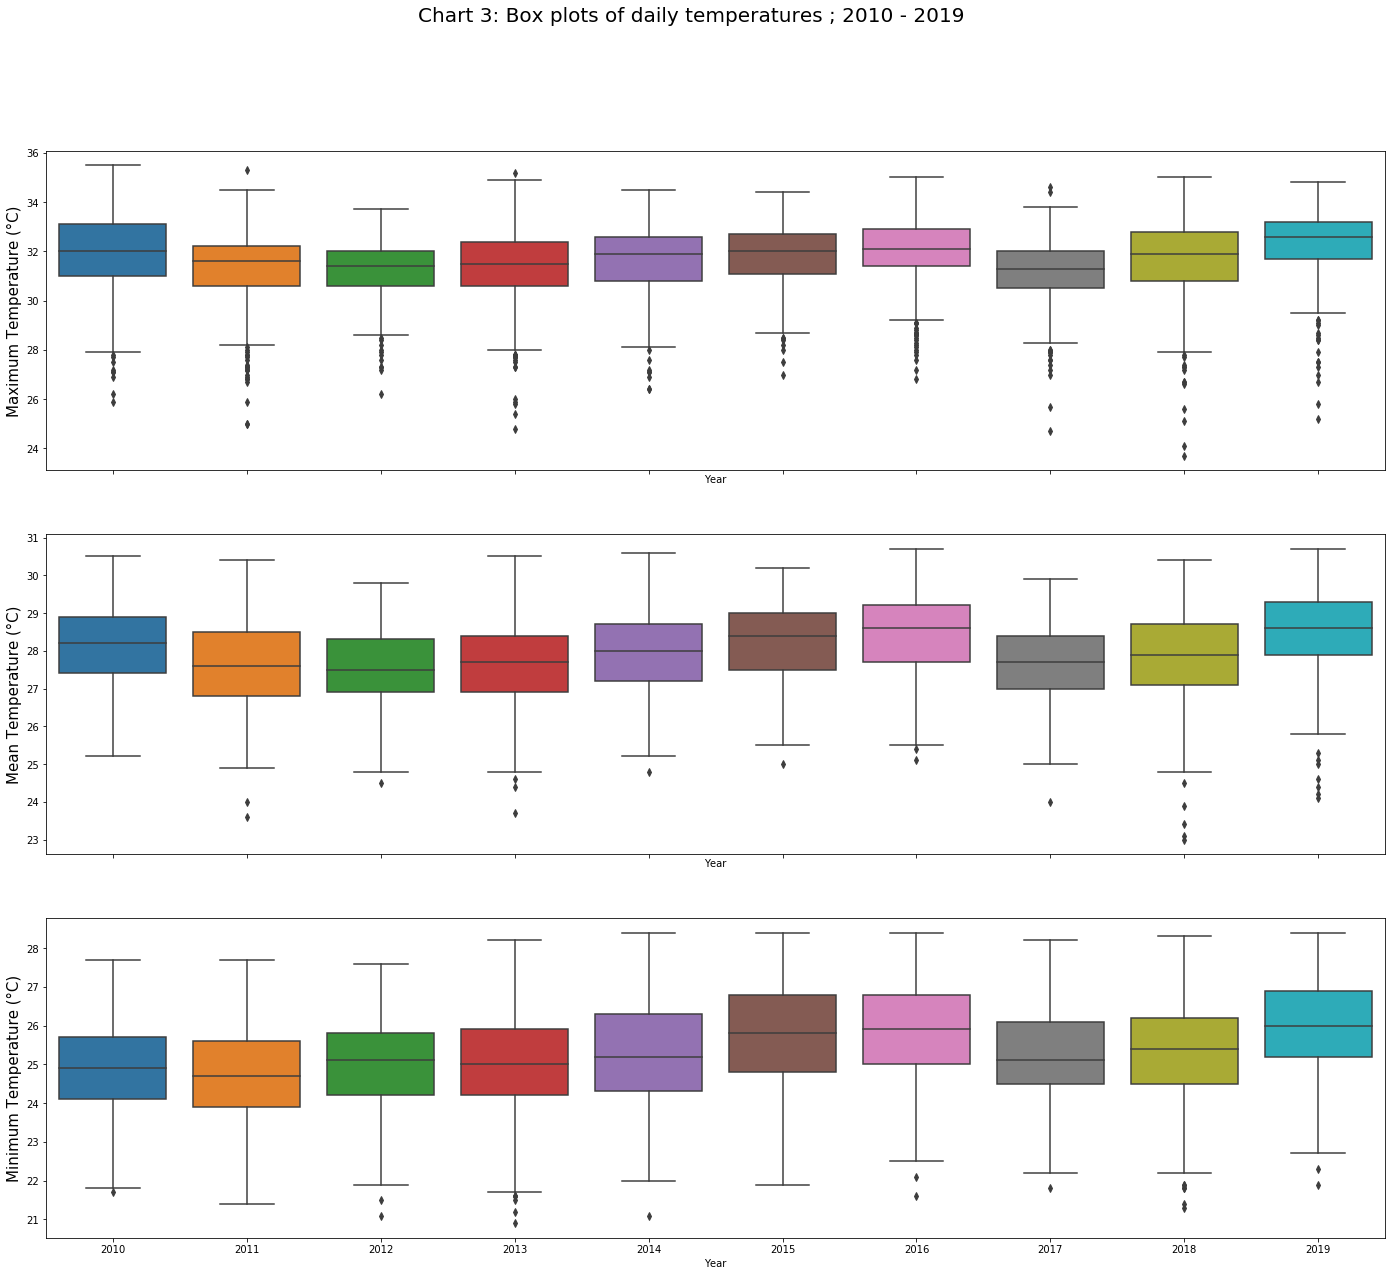

In [27]:
#Displaying Box plot to show  yearwise rainfall variation 

fig, axs = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
sns.boxplot(y="Maximum Temperature (°C)", x="Year", data=pandas_weather_2010_to_2019, ax=axs[0])
sns.boxplot(y="Mean Temperature (°C)", x="Year", data=pandas_weather_2010_to_2019, ax=axs[1])
sns.boxplot(y="Minimum Temperature (°C)", x="Year", data=pandas_weather_2010_to_2019, ax=axs[2])
fig.suptitle(
    "Chart 3: Box plots of daily temperatures ; 2010 - 2019 ", fontsize=20
)
axs[0].set_ylabel("Maximum Temperature (°C)", fontsize=15)
axs[1].set_ylabel("Mean Temperature (°C)", fontsize=15)
axs[2].set_ylabel("Minimum Temperature (°C)", fontsize=15)
plt.show()

In [28]:
pd_temp_mean = pd.read_csv('./datasets/mean_temp_monthly.csv')
pd_temp_max = pd.read_csv('./datasets/max_temp_monthly.csv')

In [29]:
pd_temp_mean = pd_temp_mean.pivot('Month', 'Year', 'Mean_Monthly_Temperature (°C)')
pd_temp_max = pd_temp_max.pivot('Month', 'Year', 'Max_Monthly_Temperature (°C)')

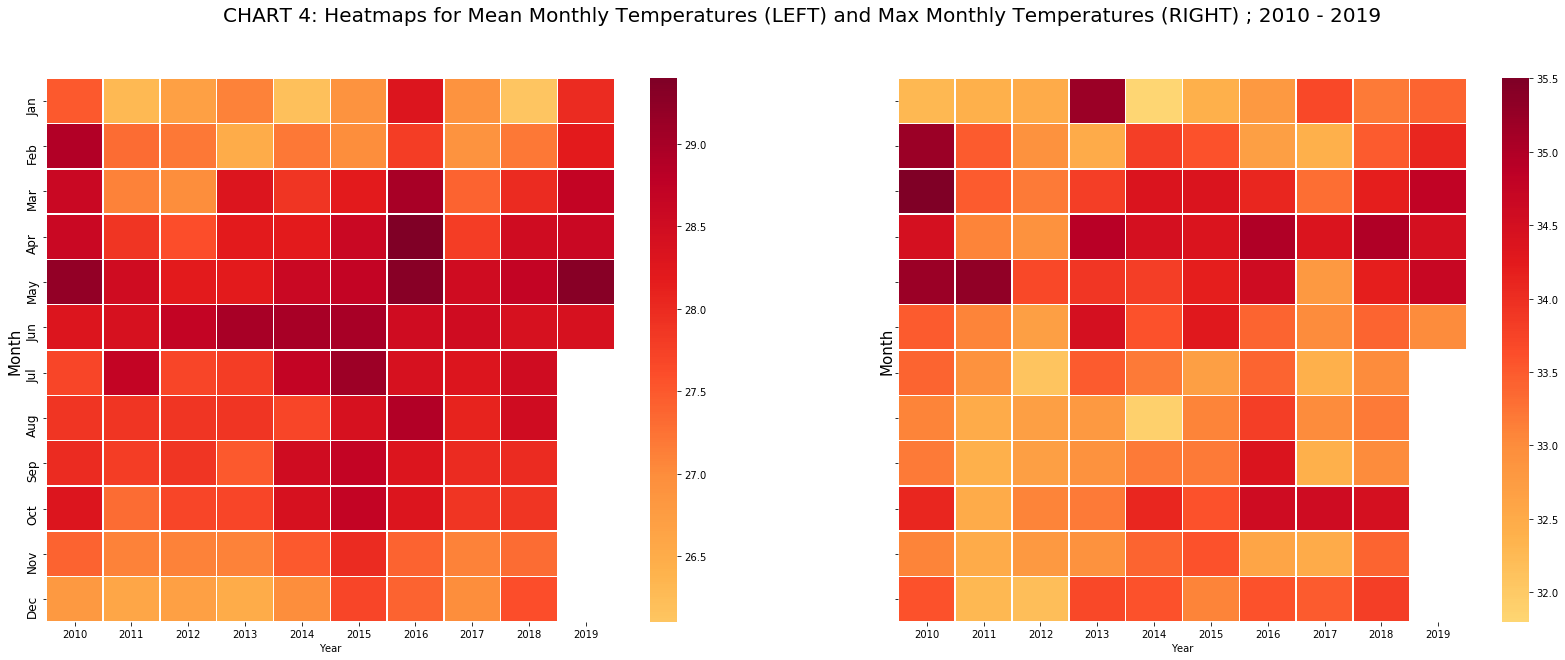

In [30]:
##Displaying heatmap to show monthwise variation in the temperature from 2010 to 2019

fig, axs = plt.subplots(1, 2, figsize=(28, 10), sharey=True)

sns.heatmap(
    pd_temp_mean,
    linewidths=0.5,
    cmap="YlOrRd",
    center=27,
    ax=axs[0]
    )

sns.heatmap(
    pd_temp_max,
    linewidths=0.5,
    cmap="YlOrRd",
    center=33,
    ax=axs[1]
    )
fig.suptitle("CHART 4: Heatmaps for Mean Monthly Temperatures (LEFT) and Max Monthly Temperatures (RIGHT) ; 2010 - 2019", fontsize=20)
axs[0].set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
axs[0].set_ylabel("Month", fontsize=15)
axs[1].set_ylabel("Month", fontsize=15)
plt.show()

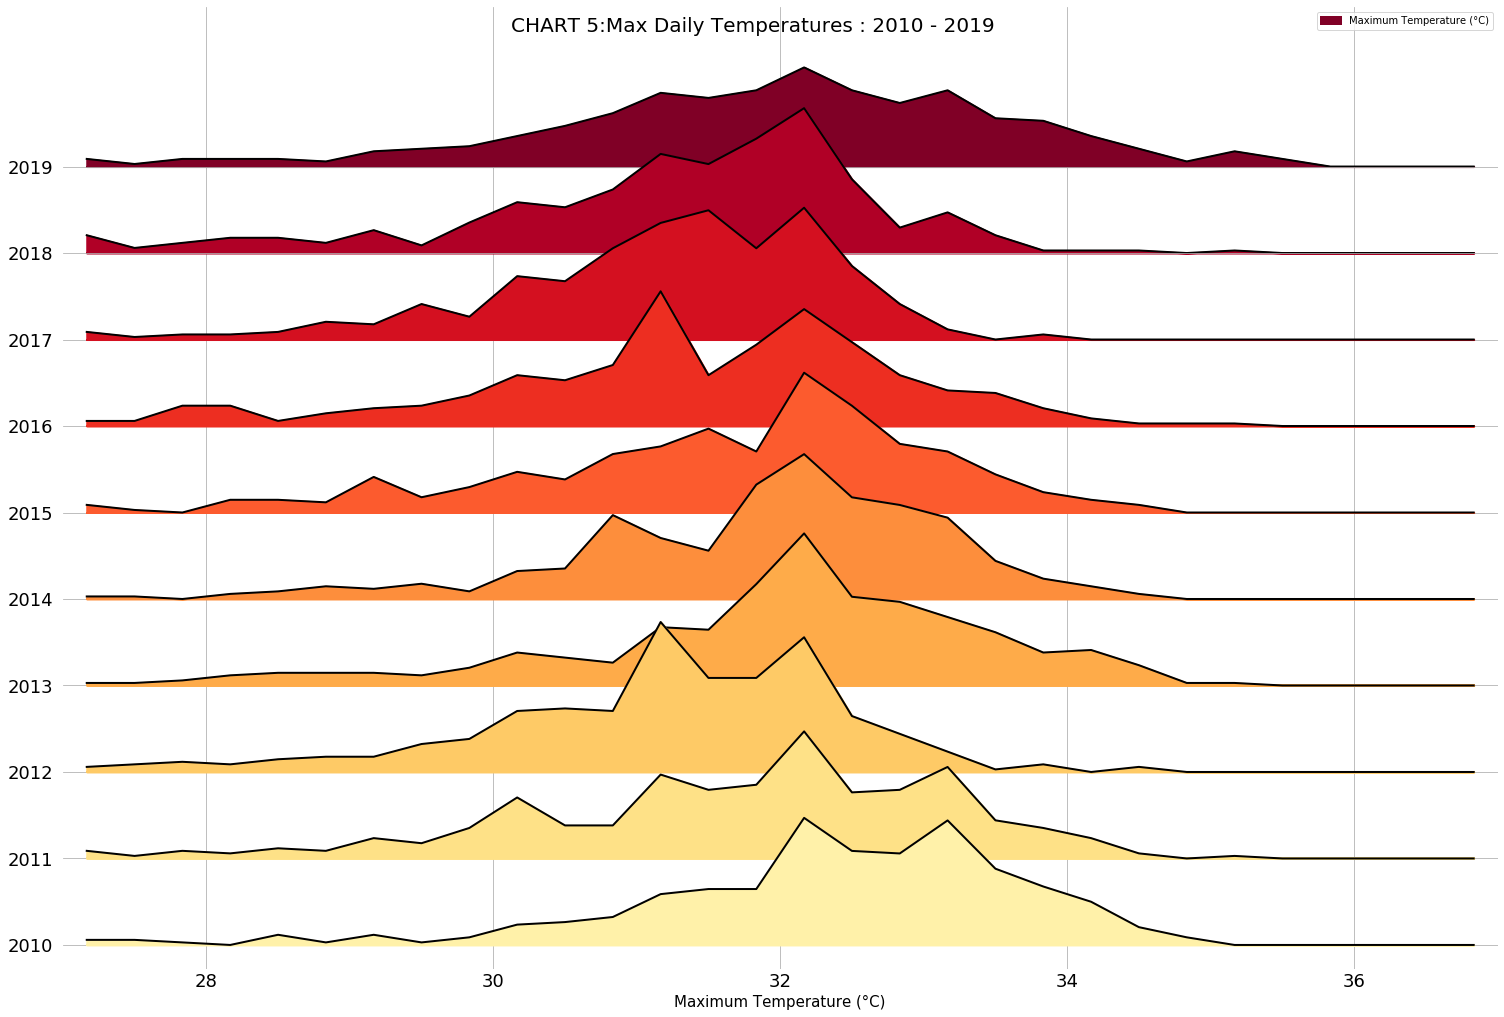

In [31]:
#displaying how Daily Temperatures varying yearwise

fig, axes = joypy.joyplot(pandas_weather_2010_to_2019, by="Year", column="Maximum Temperature (°C)",
                   kind="normalized_counts", bins=30,
                   range_style='all', x_range=[27, 37],
                   overlap=2, linewidth=2, colormap=cm.YlOrRd_r,
                   legend = True,
                   ylabelsize = 18, xlabelsize = 18, 
                   labels=pandas_weather_2010_to_2019.Year.unique(), grid='both', figsize=(21,14))
fig.suptitle("CHART 5:Max Daily Temperatures : 2010 - 2019", fontsize=20)
plt.xlabel("Maximum Temperature (°C)", fontsize=15)
plt.ylabel("Year", fontsize=15)
plt.show()

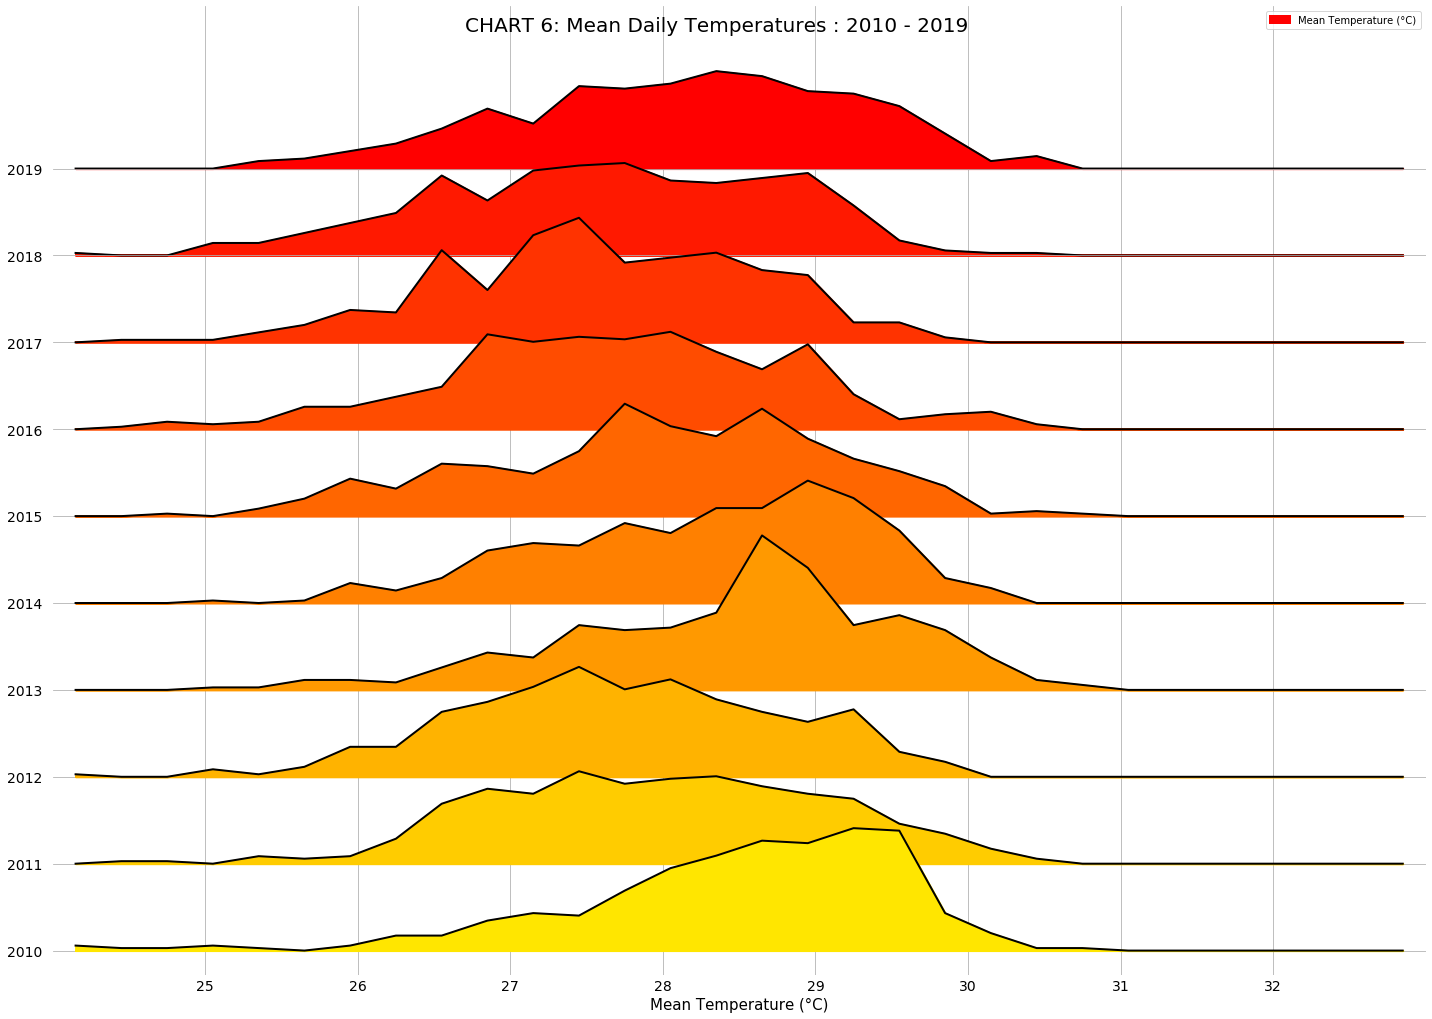

In [32]:
#displaying how Daily Mean Temperatures varying yearwise
fig, axes = joypy.joyplot(pandas_weather_2010_to_2019, by="Year", column="Mean Temperature (°C)",
                   kind="normalized_counts", bins=30,
                   range_style='all', x_range=[24, 33],
                   overlap=2, linewidth=2, colormap=cm.autumn,
                   legend = True,
                   ylabelsize = 14, xlabelsize = 14, 
                   labels=pandas_weather_2010_to_2019.Year.unique(), grid='both', figsize=(20,14),
                   )
fig.suptitle("CHART 6: Mean Daily Temperatures : 2010 - 2019", fontsize=20)
plt.xlabel("Mean Temperature (°C)", fontsize=15)
plt.ylabel("Year", fontsize=15)
plt.show()

In [33]:
#displaying monthwise rainfall

df_monthwise_rainfall=weather_2010_to_2019.groupBy("Year","Month").agg(sum("Daily Rainfall Total (mm)").alias("Monthly Rainfall Total (mm)")).sort("Year","Month")
df_monthwise_rainfall.select(df_monthwise_rainfall["Year"],df_monthwise_rainfall["Month"],
              format_number(df_monthwise_rainfall['Monthly Rainfall Total (mm)'].cast('float'),2).alias('Monthly Rainfall Total (mm)')).sort("Year","Month").show()   

+----+-----+---------------------------+
|Year|Month|Monthly Rainfall Total (mm)|
+----+-----+---------------------------+
|2010|    1|                      69.50|
|2010|    2|                       6.30|
|2010|    3|                     238.00|
|2010|    4|                     158.50|
|2010|    5|                     157.50|
|2010|    6|                     240.50|
|2010|    7|                     298.50|
|2010|    8|                     158.40|
|2010|    9|                     121.50|
|2010|   10|                     166.20|
|2010|   11|                     278.80|
|2010|   12|                     181.40|
|2011|    1|                     513.20|
|2011|    2|                      23.00|
|2011|    3|                     256.60|
|2011|    4|                     217.80|
|2011|    5|                     127.00|
|2011|    6|                     213.00|
|2011|    7|                      76.60|
|2011|    8|                      81.40|
+----+-----+---------------------------+
only showing top

In [34]:
pandas_monthwise_rainfall = df_monthwise_rainfall.select("*").toPandas()

In [35]:
pandas_monthwise_rainfall

,Year,Month,Monthly Rainfall Total (mm)
0,2010,1,69.5
1,2010,2,6.3
2,2010,3,238.0
3,2010,4,158.5
4,2010,5,157.5
...,...,...,...
115,2019,8,11.8
116,2019,9,22.8
117,2019,10,176.8
118,2019,11,137.4


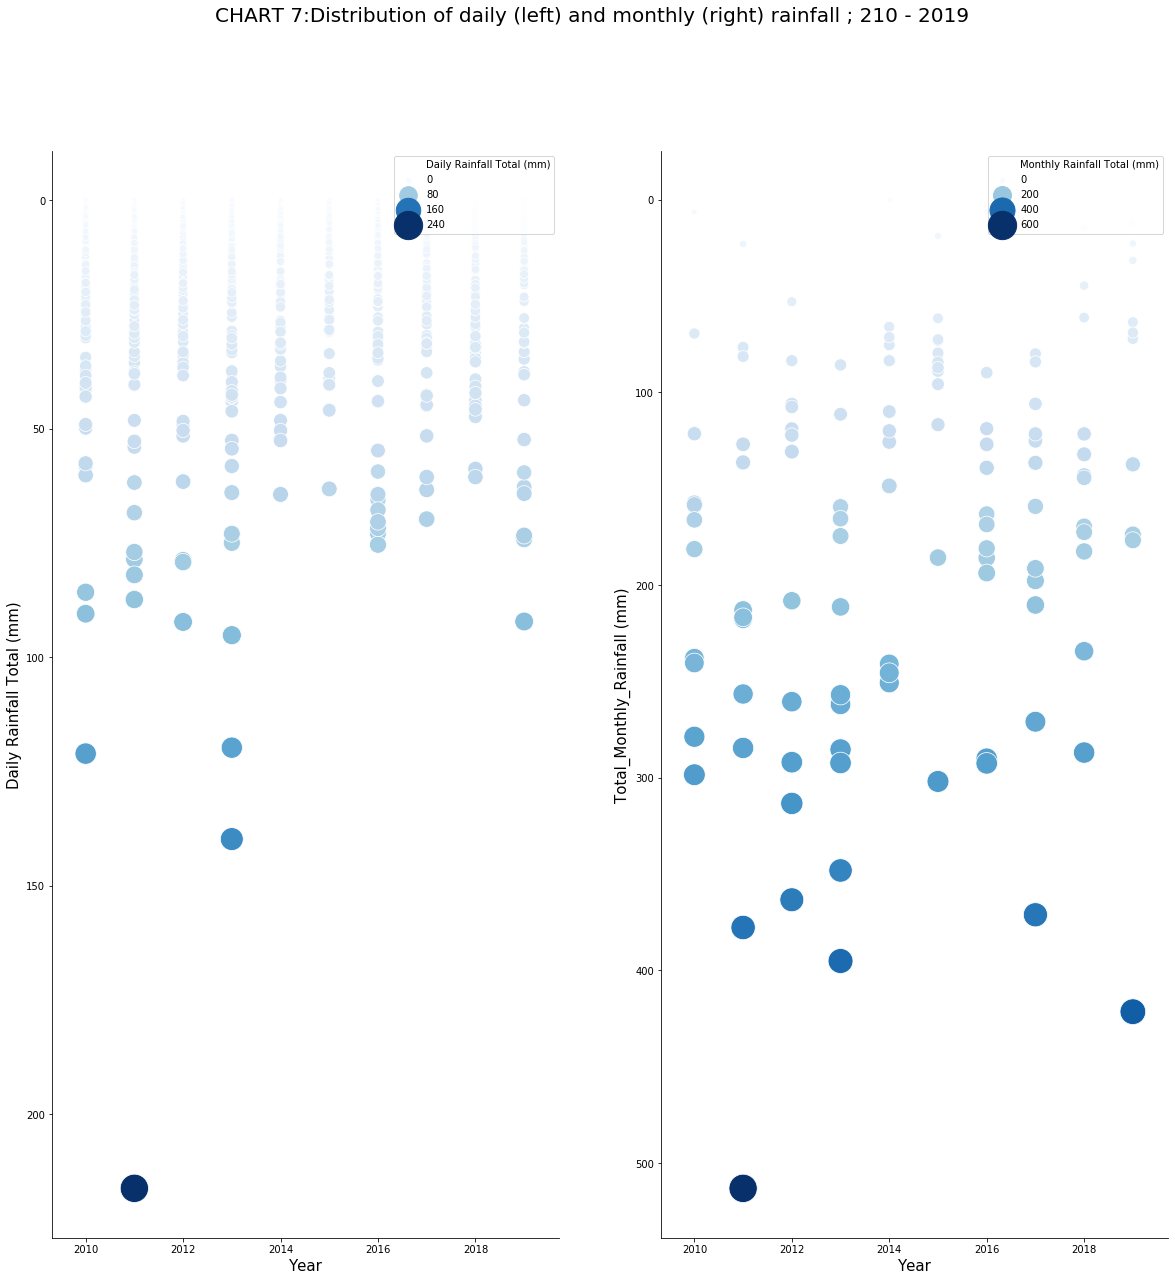

In [36]:
#graphs to show Distribution of daily and monthly rainfall
fig, axs = plt.subplots(1, 2, figsize=(20, 20), sharex=True)
ax = sns.scatterplot(
    x="Year",
    y="Daily Rainfall Total (mm)",
    data=pandas_weather_2010_to_2019,
    hue="Daily Rainfall Total (mm)",
    size = "Daily Rainfall Total (mm)",
    sizes=(20, 800),
    palette="Blues",
    ax=axs[0]
)
sns.scatterplot(
    x="Year",
    y="Monthly Rainfall Total (mm)",
    data=pandas_monthwise_rainfall,
    hue="Monthly Rainfall Total (mm)",
    size = "Monthly Rainfall Total (mm)",
    sizes=(20, 800),
    palette="Blues",
    ax=axs[1]
)
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[0].set_xlabel("Year", fontsize=15)
axs[1].set_xlabel("Year", fontsize=15)
axs[0].set_ylabel("Daily Rainfall Total (mm)", fontsize=15)
axs[1].set_ylabel("Total_Monthly_Rainfall (mm)", fontsize=15)
fig.suptitle("CHART 7:Distribution of daily (left) and monthly (right) rainfall ; 210 - 2019", fontsize=20)
sns.despine()
plt.show()

In [37]:
pandas_weather_2010_to_2019['Daily Rainfall Total (mm)'].max(), pandas_weather_2010_to_2019['Daily Rainfall Total (mm)'].mean()

(216.2, 5.31204819277109)

In [38]:
pandas_weather_2010_to_2019[pandas_weather_2010_to_2019['Daily Rainfall Total (mm)'] == 216.2]

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
3257,1/30/2011,2011,1,January,1,30,216.2,23.6,25.0,21.6,6.6,34.9


In [39]:
pandas_monthwise_rainfall['Monthly Rainfall Total (mm)'].max(), pandas_monthwise_rainfall['Monthly Rainfall Total (mm)'].mean()

(513.2, 161.6633333333333)

In [40]:
pandas_monthwise_rainfall[pandas_monthwise_rainfall['Monthly Rainfall Total (mm)'] == 513.2]

,Year,Month,Monthly Rainfall Total (mm)
12,2011,1,513.2


In [41]:
intense_rain = pandas_monthwise_rainfall[pandas_monthwise_rainfall['Monthly Rainfall Total (mm)'] > 100]
intense_rain.head()

,Year,Month,Monthly Rainfall Total (mm)
2,2010,3,238.0
3,2010,4,158.5
4,2010,5,157.5
5,2010,6,240.5
6,2010,7,298.5


In [42]:
intense_rain['Year'].value_counts().sort_index(ascending=True)

2010    10
2011     9
2012    10
2013    11
2014     7
2015     3
2016    10
2017    10
2018     9
2019     5
Name: Year, dtype: int64

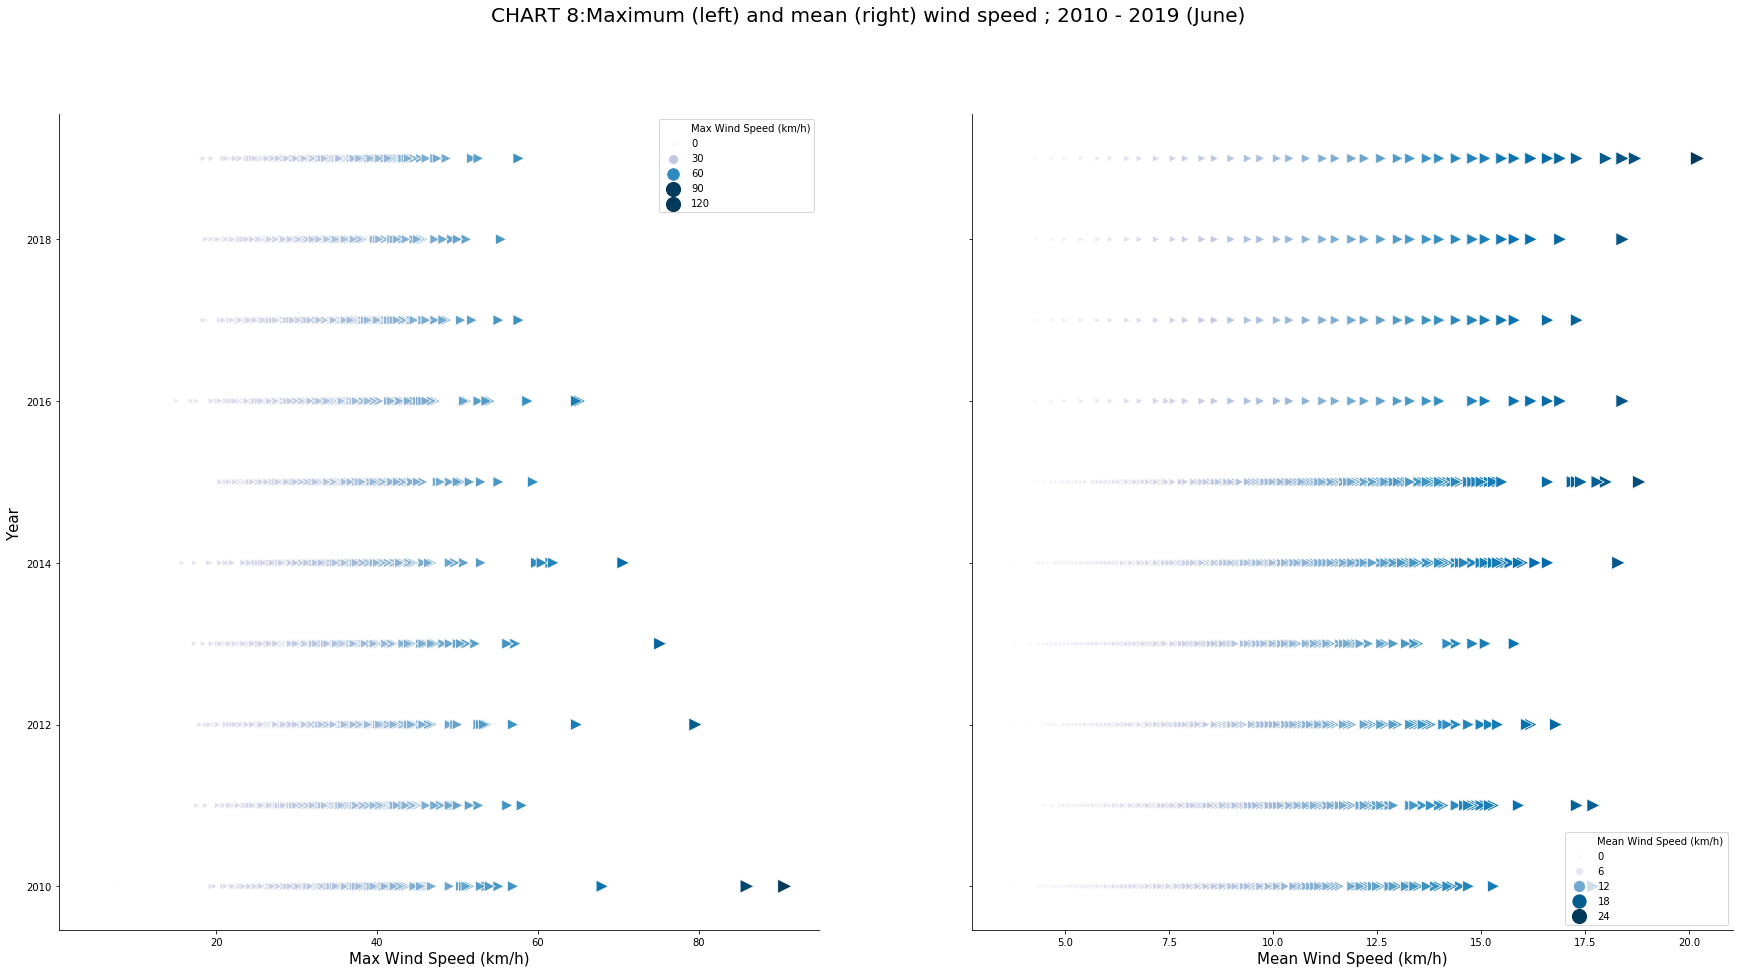

In [43]:
#displaying Maximum and mean wind speed from 2010 to 2019
fig, axs = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
sns.scatterplot(
    x="Max Wind Speed (km/h)",
    y="Year",
    data=pandas_weather_2010_to_2019,
    marker=">",
    sizes=(10, 200),
    size="Max Wind Speed (km/h)",
    hue="Max Wind Speed (km/h)",
    palette="PuBu",
    ax=axs[0]
)
sns.scatterplot(
    x="Mean Wind Speed (km/h)",
    y="Year",
    data=pandas_weather_2010_to_2019,
    marker=">",
    sizes=(10, 200),
    size="Mean Wind Speed (km/h)",
    hue="Mean Wind Speed (km/h)",
    palette="PuBu",
    ax=axs[1]
)
fig.suptitle("CHART 8:Maximum (left) and mean (right) wind speed ; 2010 - 2019 (June)", fontsize=20)
axs[0].set_ylabel("Year", fontsize=15)
axs[0].set_xlabel("Max Wind Speed (km/h)", fontsize=15)
axs[1].set_xlabel("Mean Wind Speed (km/h)", fontsize=15)
sns.despine()
plt.show()

In [44]:
pandas_weather_2010_to_2019['Max Wind Speed (km/h)'].max()

90.7

In [45]:
pandas_weather_2010_to_2019[pandas_weather_2010_to_2019['Max Wind Speed (km/h)'] == 90.7]

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
3319,11/29/2010,2010,11,November,4,29,30.2,26.3,31.8,23.5,5.8,90.7


In [46]:
pandas_weather_2010_to_2019['Max Wind Speed (km/h)'].mean()

32.81174155124857

In [47]:
# The CSV file was pre-processed in notebook 1.0

weather = pandas_weather_2010_to_2019.sort_values('Date', ascending=True)

In [48]:
# Setting filter criteria for comparing Q3 2019 with Q3s of 1983-2018

crit1= weather['Year'] ==2019
crit2= weather['Year'] !=2019
crit3= weather['Month'] == 7
crit4= weather['Month'] == 8
crit5= weather['Month'] == 9

In [49]:
#Q3 weather data for years 2019
weather_q32019 = weather[crit1 & (crit3 | crit4 | crit5)]

#Q3 weather data for years 1983 - 2018
historic_q3 = weather[crit2 & (crit3 | crit4 | crit5)]

In [50]:
weather_q32019.shape, historic_q3.shape

((92, 12), (828, 12))

In [51]:
weather_q32019.head()

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
183,7/1/2019,2019,7,July,3,1,0.0,29.4,32.1,27.7,14.8,36.0
174,7/10/2019,2019,7,July,3,10,0.0,29.4,32.1,27.6,18.4,34.2
173,7/11/2019,2019,7,July,3,11,0.0,29.6,32.9,27.5,16.6,34.6
172,7/12/2019,2019,7,July,3,12,0.0,29.2,32.6,27.4,13.0,36.7
171,7/13/2019,2019,7,July,3,13,0.0,29.4,32.6,27.1,14.4,38.5


In [52]:
historic_q3.head()

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
3470,7/1/2010,2010,7,July,3,1,0.4,28.1,30.9,26.0,6.0,34.2
3105,7/1/2011,2011,7,July,3,1,0.0,28.6,31.5,25.0,12.8,30.2
2739,7/1/2012,2012,7,July,3,1,3.6,28.6,31.6,25.9,12.6,49.7
2374,7/1/2013,2013,7,July,3,1,0.0,28.8,32.4,26.0,6.0,29.9
2009,7/1/2014,2014,7,July,3,1,0.0,28.2,32.6,25.9,5.9,27.7


In [53]:
weather.tail()

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1574,9/9/2015,2015,9,September,3,9,17.4,27.0,31.7,23.6,6.7,42.1
1208,9/9/2016,2016,9,September,3,9,6.6,27.8,32.2,25.3,7.2,45.7
843,9/9/2017,2017,9,September,3,9,2.6,27.9,30.9,24.7,6.1,47.2
478,9/9/2018,2018,9,September,3,9,15.4,27.4,30.3,23.3,5.8,29.2
113,9/9/2019,2019,9,September,3,9,0.0,29.5,33.6,27.2,14.8,33.1


In [54]:
print(
    "Highest maximum daily temperature between 2010 and Sept 2019:",
    weather["Maximum Temperature (°C)"].max(),"°C"
)

print(
    "Average maximum daily temperature between 2010 and Sept 2019:",
    weather["Maximum Temperature (°C)"].mean(),"°C"
)

print(
    "Highest average daily temperature between 2010 and Sept 2019:",
    weather["Mean Temperature (°C)"].max(),"°C"
)

print(
    "Average daily temperature recorded 2010 and Sept 2019:",
    weather["Mean Temperature (°C)"].mean(),"°C"
)

print(
    "Average minimum daily temperature recorded 2010 and Sept 2019:",
    weather["Minimum Temperature (°C)"].mean(),"°C"
)

Highest maximum daily temperature between 2010 and Sept 2019: 35.5 °C
Average maximum daily temperature between 2010 and Sept 2019: 31.6062157721796 °C
Highest average daily temperature between 2010 and Sept 2019: 30.7 °C
Average daily temperature recorded 2010 and Sept 2019: 27.94646768893753 °C
Average minimum daily temperature recorded 2010 and Sept 2019: 25.29175794085432 °C


In [55]:
print(
    "Highest maximum daily temperature between July and September 2019:",
    weather_q32019["Maximum Temperature (°C)"].max(),"°C"
)

print(
    "Average maximum daily temperature between July and September 2019:",
    weather_q32019["Maximum Temperature (°C)"].mean(),"°C"
)

print(
    "Highest average daily temperature between July and September 2019:",
    weather_q32019["Mean Temperature (°C)"].max(),"°C"
)

print(
    "Average daily temperature between July and September 2019:",
    weather_q32019["Mean Temperature (°C)"].mean(),"°C"
)

print(
    "Average minimum daily temperature between July and September 2019:",
    weather_q32019["Minimum Temperature (°C)"].mean(),"°C"
)

Highest maximum daily temperature between July and September 2019: 34.3 °C
Average maximum daily temperature between July and September 2019: 32.592391304347835 °C
Highest average daily temperature between July and September 2019: 29.8 °C
Average daily temperature between July and September 2019: 29.061956521739145 °C
Average minimum daily temperature between July and September 2019: 26.868478260869555 °C


In [56]:
weather_q32019[weather_q32019["Mean Temperature (°C)"] == 29.8]

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
141,8/12/2019,2019,8,August,3,12,0.0,29.8,33.2,27.8,16.2,37.1
137,8/16/2019,2019,8,August,3,16,0.0,29.8,33.2,27.7,15.5,36.4


In [57]:
print(
    "Highest maximum daily temperature between July and September; 2010-2018:",
    historic_q3["Maximum Temperature (°C)"].max(),"°C"
)

print(
    "Average maximum daily temperature between July and September; 2010-2018:",
    historic_q3["Maximum Temperature (°C)"].mean(),"°C"
)

print(
    "Highest average daily temperature between July and September; 2010-2018:",
    historic_q3["Mean Temperature (°C)"].max(),"°C"
)

print(
    "Average daily temperature between July and September; 2010-2018:",
    historic_q3["Mean Temperature (°C)"].mean(),"°C"
)

print(
    "Average minimum daily temperature between July and September; 20102010-2018:",
    historic_q3["Minimum Temperature (°C)"].mean(),"°C"
)

Highest maximum daily temperature between July and September; 2010-2018: 34.4 °C
Average maximum daily temperature between July and September; 2010-2018: 31.305072463768067 °C
Highest average daily temperature between July and September; 2010-2018: 30.2 °C
Average daily temperature between July and September; 2010-2018: 28.180797101449315 °C
Average minimum daily temperature between July and September; 20102010-2018: 25.525603864734283 °C


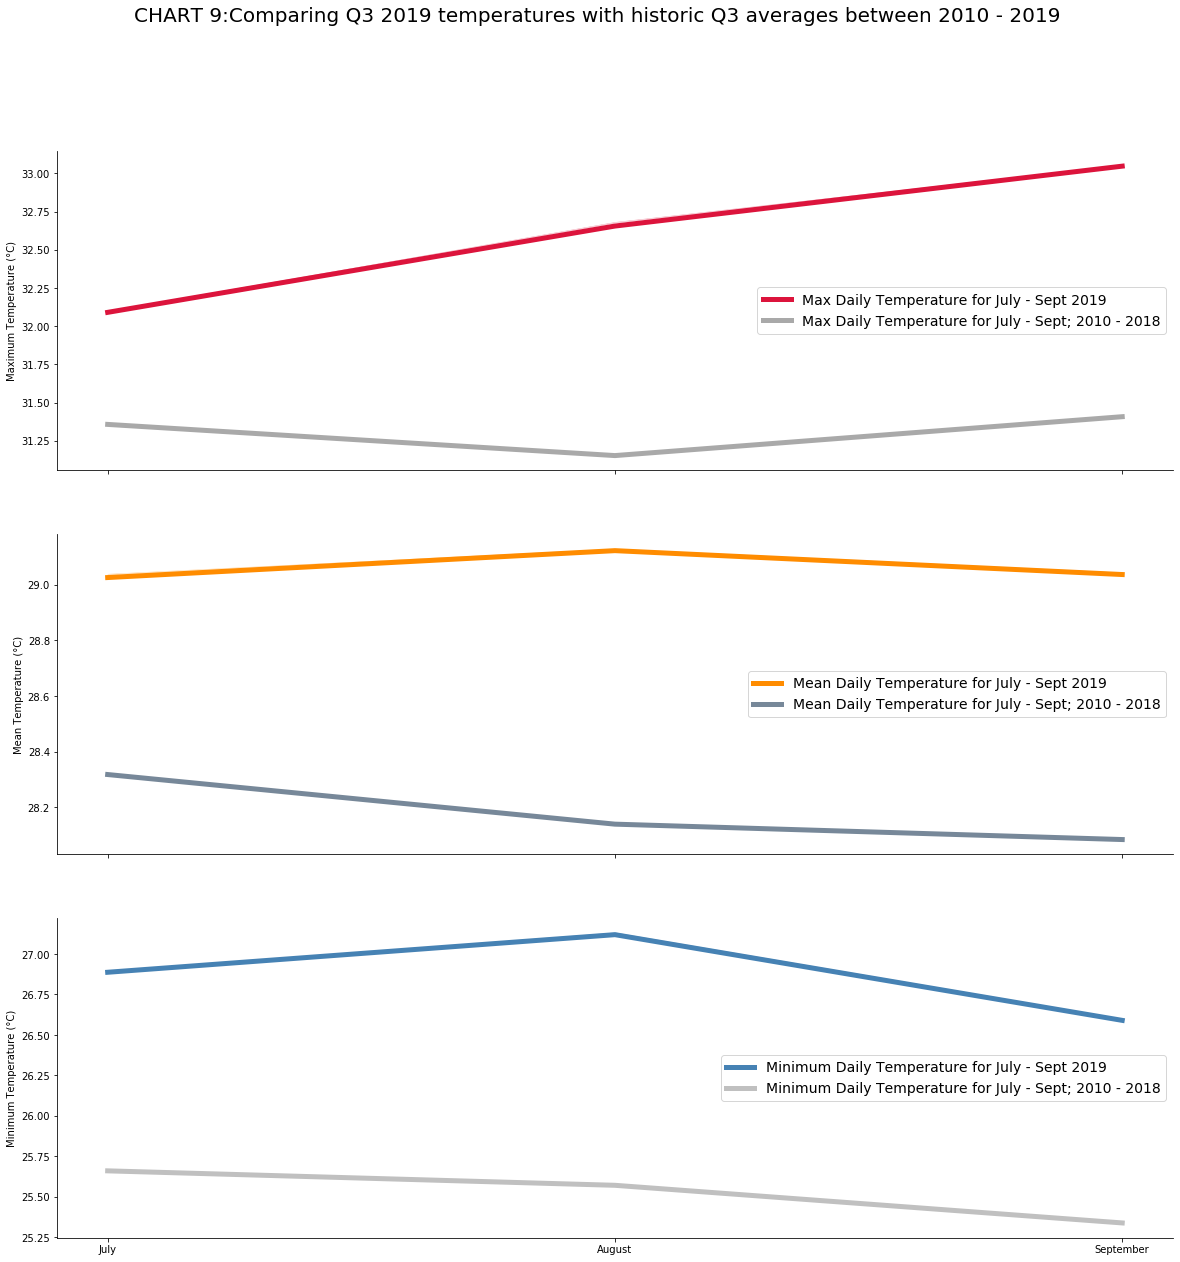

In [58]:
#Comparing Q3 2019 temperatures with historic Q3 averages between 2010 - 2019

fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharex=True)
sns.lineplot(
    x="Month_Name",
    y="Maximum Temperature (°C)",
    linewidth=5,
    data=weather_q32019,
    label="Max Daily Temperature for July - Sept 2019",
    color="crimson",
    ci=False,
    sort=False,
    ax=axs[0],
)
sns.lineplot(
    x="Month_Name",
    y="Maximum Temperature (°C)",
    linewidth=5,
    data=historic_q3,
    label="Max Daily Temperature for July - Sept; 2010 - 2018",
    color="darkgrey",
    ci=False,
    sort=False,
    ax=axs[0],
)


sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    linewidth=5,
    data=weather_q32019,
    label="Mean Daily Temperature for July - Sept 2019",
    color="darkorange",
    ci=False,
    sort=False,
    ax=axs[1],
)
sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    linewidth=5,
    data=historic_q3,
    label="Mean Daily Temperature for July - Sept; 2010 - 2018",
    color="lightslategrey",
    ci=False,
    sort=False,
    ax=axs[1],
)


sns.lineplot(
    x="Month_Name",
    y="Minimum Temperature (°C)",
    linewidth=5,
    data=weather_q32019,
    label="Minimum Daily Temperature for July - Sept 2019",
    color="steelblue",
    ci=False,
    sort=False,
    ax=axs[2],
)
sns.lineplot(
    x="Month_Name",
    y="Minimum Temperature (°C)",
    linewidth=5,
    data=historic_q3,
    label="Minimum Daily Temperature for July - Sept; 2010 - 2018",
    color="silver",
    ci=False,
    sort=False,
    ax=axs[2])

fig.suptitle("CHART 9:Comparing Q3 2019 temperatures with historic Q3 averages between 2010 - 2019", fontsize=20)

for ax in axs:
    ax.legend(fontsize=14, loc=7)

sns.despine()
plt.xlabel("")
plt.show()

In [59]:
compare = pandas_weather_2010_to_2019[
    (pandas_weather_2010_to_2019["Year"] == 2010)
    | (pandas_weather_2010_to_2019["Year"] == 2013)
    | (pandas_weather_2010_to_2019["Year"] == 2016)
    | (pandas_weather_2010_to_2019["Year"] == 2019)
]

In [60]:
compare

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,12/31/2019,2019,12,December,4,31,0.0,27.8,32.2,25.3,11.5,34.2
1,12/30/2019,2019,12,December,4,30,0.0,28.0,31.6,25.5,11.9,32.0
2,12/29/2019,2019,12,December,4,29,0.0,27.9,31.6,25.7,13.7,34.6
3,12/28/2019,2019,12,December,4,28,0.0,27.7,31.1,25.5,13.3,37.1
4,12/27/2019,2019,12,December,4,27,0.0,27.7,31.4,25.1,12.2,33.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,1/5/2010,2010,1,January,1,5,0.0,27.5,31.6,24.7,9.7,31.7
3648,1/4/2010,2010,1,January,1,4,0.4,26.3,27.9,23.7,7.5,36.0
3649,1/3/2010,2010,1,January,1,3,0.5,28.0,31.4,25.4,9.1,29.9
3650,1/2/2010,2010,1,January,1,2,0.0,27.8,31.8,24.7,8.8,30.2


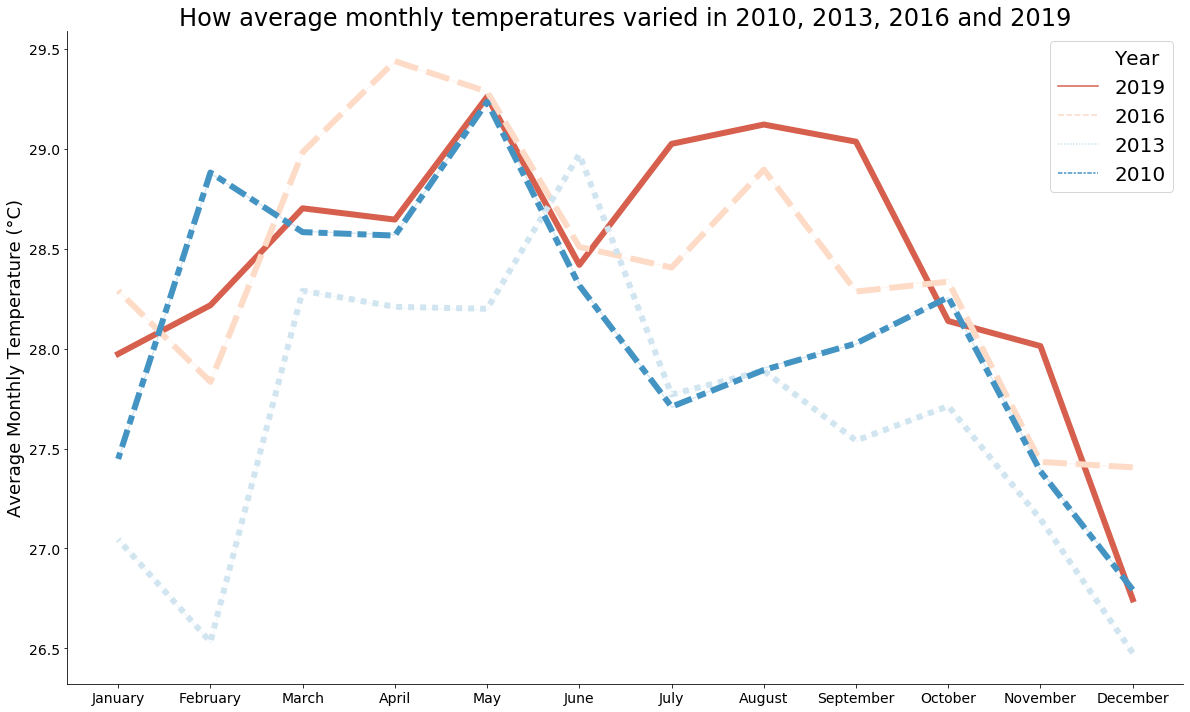

In [61]:
#How average monthly temperatures varied in 2010, 2013, 2016 and 2019

fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    linewidth=6,
    data=compare,
    hue="Year",
    hue_order=[2019, 2016, 2013, 2010],
    style="Year",
    style_order=[2019, 2016, 2013, 2010],
    legend="full",
    ci=False,
    sort=False,
    palette=sns.color_palette("RdBu", 4),
)

plt.title(
    "How average monthly temperatures varied in 2010, 2013, 2016 and 2019",
    fontsize=24,
)

ax.invert_xaxis()

plt.xlabel("")
plt.ylabel("Average Monthly Temperature (°C)", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.despine()

plt.legend(fontsize=20, loc="best")

plt.show()

In [62]:
pandas_weather_2010_to_2019

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,12/31/2019,2019,12,December,4,31,0.0,27.8,32.2,25.3,11.5,34.2
1,12/30/2019,2019,12,December,4,30,0.0,28.0,31.6,25.5,11.9,32.0
2,12/29/2019,2019,12,December,4,29,0.0,27.9,31.6,25.7,13.7,34.6
3,12/28/2019,2019,12,December,4,28,0.0,27.7,31.1,25.5,13.3,37.1
4,12/27/2019,2019,12,December,4,27,0.0,27.7,31.4,25.1,12.2,33.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,1/5/2010,2010,1,January,1,5,0.0,27.5,31.6,24.7,9.7,31.7
3648,1/4/2010,2010,1,January,1,4,0.4,26.3,27.9,23.7,7.5,36.0
3649,1/3/2010,2010,1,January,1,3,0.5,28.0,31.4,25.4,9.1,29.9
3650,1/2/2010,2010,1,January,1,2,0.0,27.8,31.8,24.7,8.8,30.2


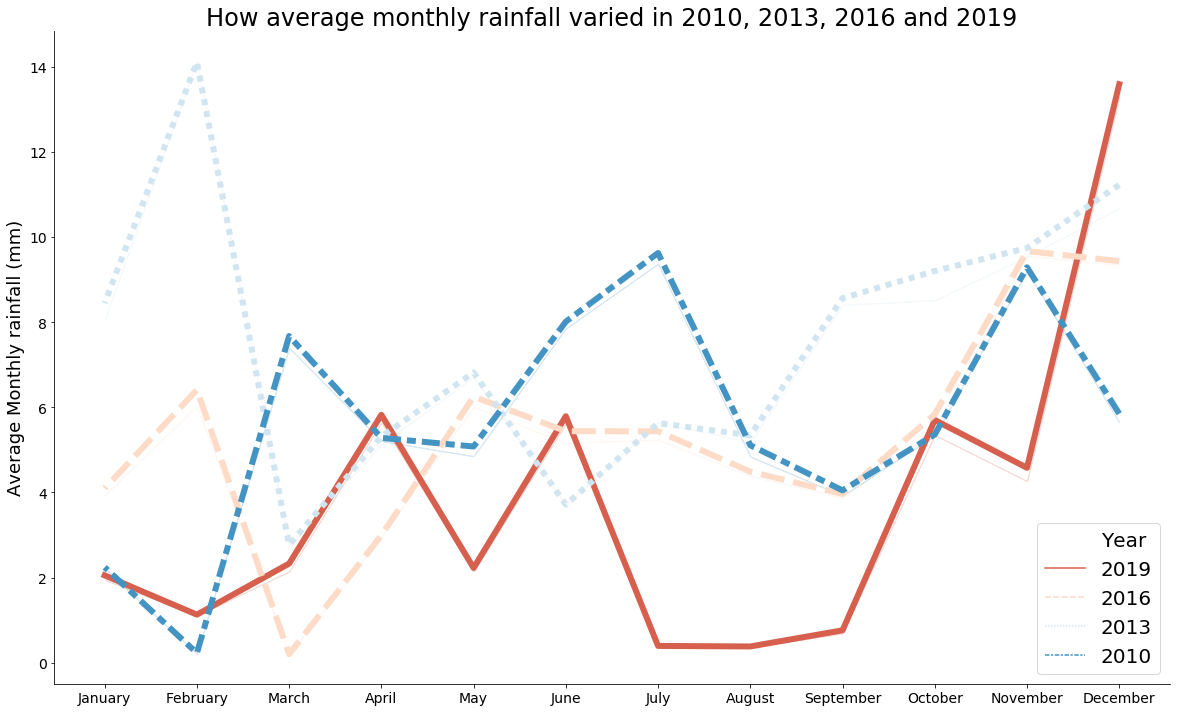

In [63]:
#How average monthly rainfall varied in 2010, 2013, 2016 and 2019

fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(
    x="Month_Name",
    y="Daily Rainfall Total (mm)",
    linewidth=6,
    data=compare,
    hue="Year",
    hue_order=[2019, 2016, 2013, 2010],
    style="Year",
    style_order=[2019, 2016, 2013, 2010],
    legend="full",
    ci=False,
    sort=False,
    palette=sns.color_palette("RdBu", 4),
)

plt.title(
    "How average monthly rainfall varied in 2010, 2013, 2016 and 2019",
    fontsize=24,
)

ax.invert_xaxis()

plt.xlabel("")
plt.ylabel("Average Monthly rainfall (mm)", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.despine()

plt.legend(fontsize=20, loc="best")

plt.show()

In [64]:
# Setting filter criteria for comparing Q3 2019 with Q3s of 2010-2018

crit1= pandas_weather_2010_to_2019['Year'] ==2019
crit2= pandas_weather_2010_to_2019['Year'] !=2019
crit3= pandas_weather_2010_to_2019['Month'] == 7
crit4= pandas_weather_2010_to_2019['Month'] == 8
crit5= pandas_weather_2010_to_2019['Month'] == 9

In [65]:
#Q3 weather data for years 2019
weather_q32019 = pandas_weather_2010_to_2019[crit1 & (crit3 | crit4 | crit5)]

#Q3 weather data for years 2010 - 2018
historic_q3 = pandas_weather_2010_to_2019[crit2 & (crit3 | crit4 | crit5)]

In [66]:
weather_q32019

,Date,Year,Month,Month_Name,Quarter,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
92,9/30/2019,2019,9,September,3,30,1.4,27.5,31.3,25.1,6.8,34.2
93,9/29/2019,2019,9,September,3,29,0.0,28.4,33.3,26.5,6.8,41.4
94,9/28/2019,2019,9,September,3,28,0.0,28.9,34.3,26.0,7.6,29.5
95,9/27/2019,2019,9,September,3,27,0.0,29.2,34.1,26.8,9.7,30.6
96,9/26/2019,2019,9,September,3,26,0.0,28.5,33.5,25.4,9.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179,7/5/2019,2019,7,July,3,5,0.0,29.5,32.8,27.8,15.5,42.5
180,7/4/2019,2019,7,July,3,4,0.0,29.3,32.3,27.3,11.2,27.7
181,7/3/2019,2019,7,July,3,3,0.2,28.7,31.0,26.9,9.7,28.4
182,7/2/2019,2019,7,July,3,2,0.0,29.7,32.3,27.9,13.0,33.8


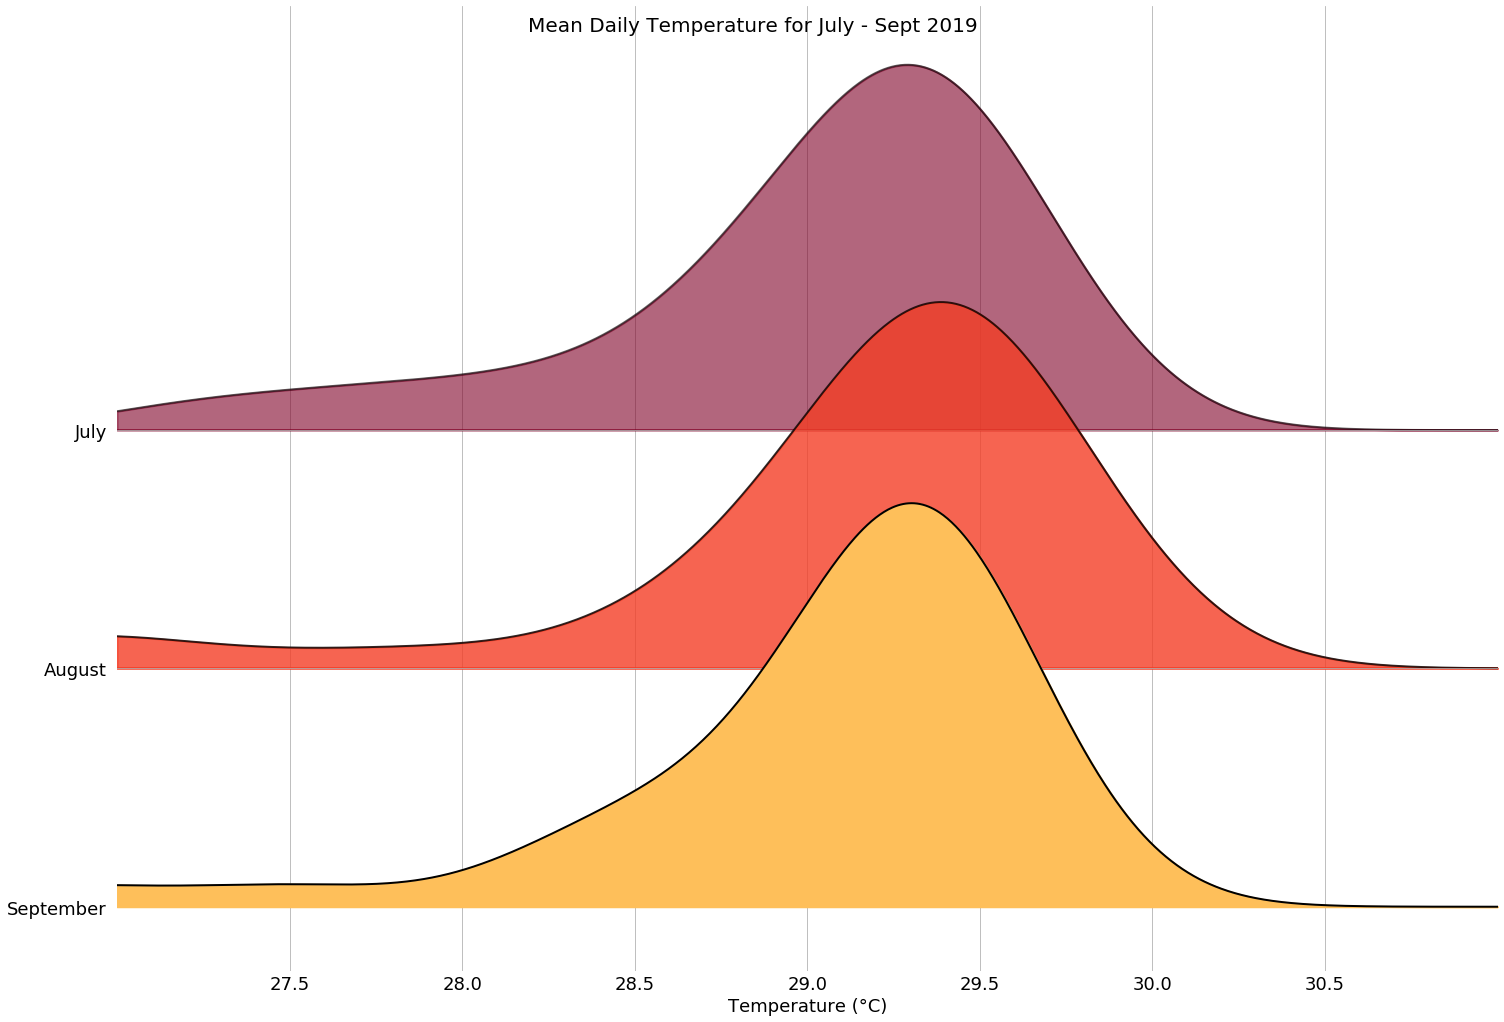

In [67]:
# JOYPLOTS COMPARING Q3 2019 WITH HISTORIC Q3 WEATHER DATA
labels = ["July", "August", "September"]
fig, axes = joypy.joyplot(
    weather_q32019,
    by="Month",
    column="Mean Temperature (°C)",
    kind="kde",
    tails=0.2,
    range_style="all",
    x_range=[27, 31],
    overlap=5,
    linewidth=2,
    colormap=cm.YlOrRd_r,
    fade=True,
    legend=False,
    labels=labels,
    ylabelsize=18,
    xlabelsize=18,
    grid="both",
    figsize=(21, 14),
)
fig.suptitle("Mean Daily Temperature for July - Sept 2019", fontsize=20)
plt.xlabel("Temperature (°C)", fontsize=18)
plt.ylabel("")
plt.show()

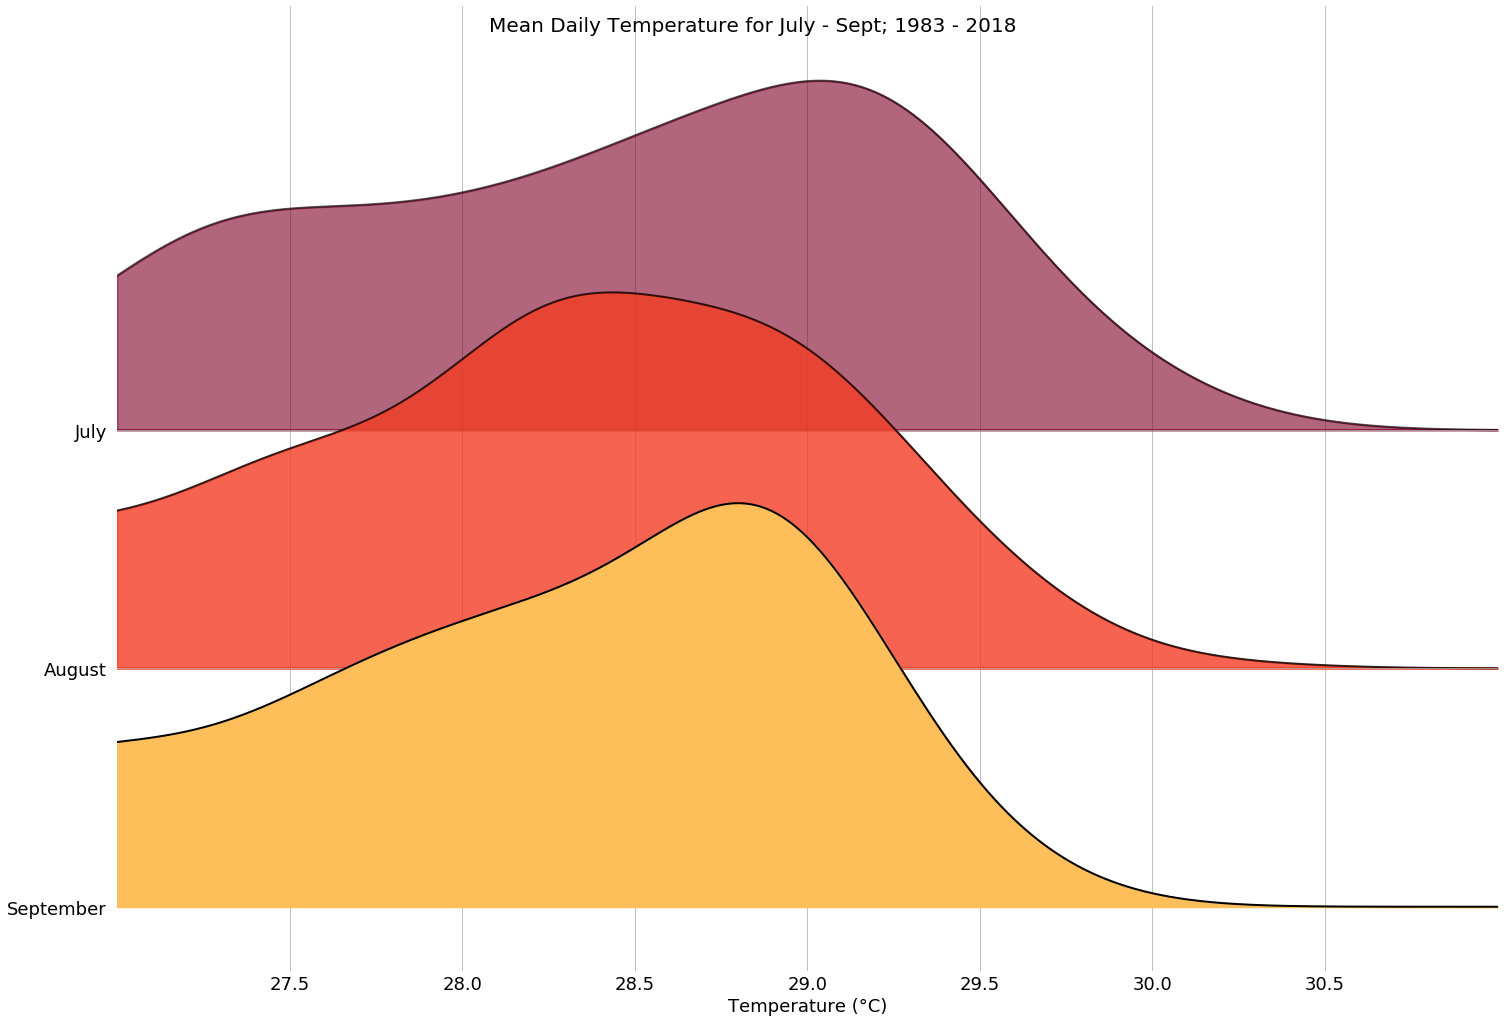

In [68]:
labels = ["July", "August", "September"]
fig, axes = joypy.joyplot(
    historic_q3,
    by="Month",
    column="Mean Temperature (°C)",
    kind="kde",
    tails=0.2,
    range_style="all",
    x_range=[27, 31],
    overlap=5,
    linewidth=2,
    colormap=cm.YlOrRd_r,
    fade=True,
    legend=False,
    labels=labels,
    ylabelsize=18,
    xlabelsize=18,
    grid="both",
    figsize=(21, 14),
)
fig.suptitle("Mean Daily Temperature for July - Sept; 1983 - 2018", fontsize=20)
plt.xlabel("Temperature (°C)", fontsize=18)
plt.ylabel("")
plt.show()

In [ ]:
#COMPARING NUMBER OF DAYS WHERE MEAN AND MAXIMUM TEMPERATURES ARE ABOVE HISTORIC AVERAGE
#Another way to illustrate how hot Q3 2019 had been vis-a-vis Q3s in other years is to compare the number of days in Q3 2019 where the mercury had soared above the long term mean for Q3s in other years.

#The two benchmarks I'll use are:
#* 31.39°C: Average maximum daily temperature recorded between July and September in years between 2010 and 2018.


#* 27.92°C: Average daily temperature recorded between July and September in years between 2010 and 2018.

In [70]:
crit8 = pandas_weather_2010_to_2019['Maximum Temperature (°C)'] > 31.39
crit9 = pandas_weather_2010_to_2019['Mean Temperature (°C)'] > 27.92

In [71]:
# Filtering for 2 new dataframes
# First is for Q3 weather data where the max daily temperature is above the historic mean of 31.39°C 
weather_q3_maxtemp = pandas_weather_2010_to_2019[crit8 & (crit3 | crit4 | crit5)]

# Second dataframe is for Q3 weather data where the mean daily temperature is above the historic mean of 27.92°C
weather_q3_meantemp = pandas_weather_2010_to_2019[crit9 & (crit3 | crit4 | crit5)]

In [72]:
weather_q3_maxtemp.shape, weather_q3_meantemp.shape

((544, 12), (613, 12))

In [ ]:
#IN Q3 2019, HOW MANY DAYS SAW THE MAXIMUM DAILY TEMPERATURE RISE ABOVE THE LONG TERM MEAN?

# Ans is 2019 we have 81 days saw the maximum daily temperaature rise above the long term mean.

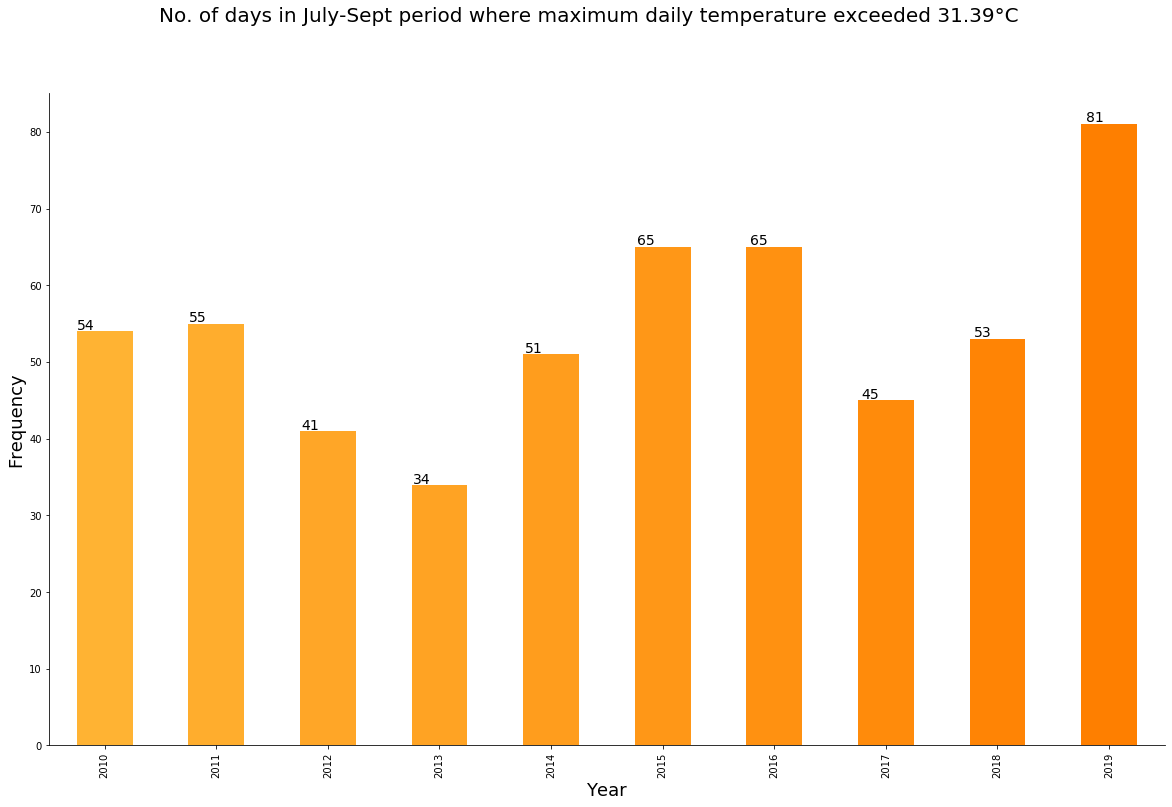

In [75]:
color = cm.afmhot_r(np.linspace(.4,.8, 37))

fig, ax = plt.subplots(figsize=(20, 12))                     
weather_q3_maxtemp['Year'].value_counts().sort_index(ascending=True).plot(kind="bar", color=color)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)
    
fig.suptitle("No. of days in July-Sept period where maximum daily temperature exceeded 31.39°C", fontsize=20)

plt.xlabel("Year", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

sns.despine()
plt.show()


In [ ]:
#IN Q3 2019, HOW MANY DAYS WERE THE MEAN DAILY TEMPERATURE ABOVE THE LONG TERM MEAN?

#Ans is 84

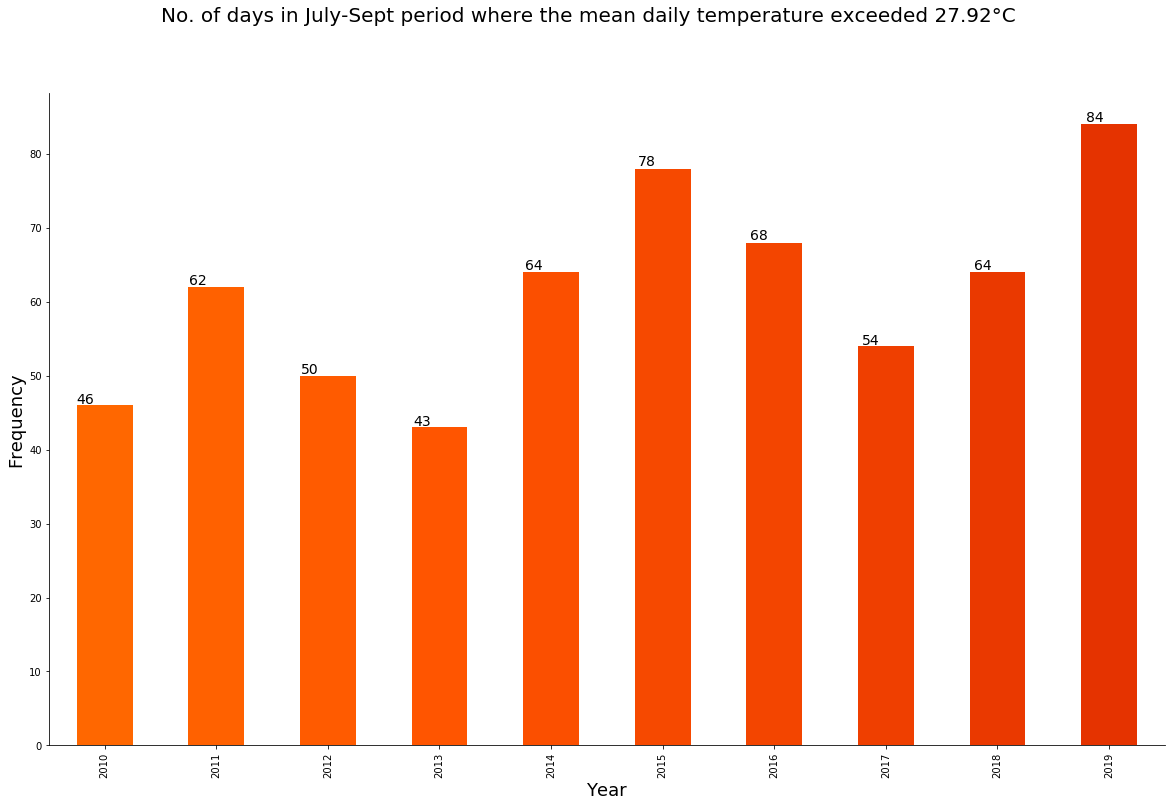

In [76]:
color = cm.gist_heat_r(np.linspace(.3,.7, 37)) 

fig, ax = plt.subplots(figsize=(20, 12))
weather_q3_meantemp['Year'].value_counts().sort_index(ascending=True).plot(kind="bar", color=color)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)
    
fig.suptitle("No. of days in July-Sept period where the mean daily temperature exceeded 27.92°C", fontsize=20)

plt.xlabel("Year", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

sns.despine()
plt.show()